In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("ticks")

In [171]:
from sklearn.metrics import recall_score, f1_score, confusion_matrix

In [172]:
prob1 = np.load('../result/concept_drift/detector_1/prob.npy')
prob2 = np.load('../result/concept_drift/detector_2/prob.npy')
prob3 = np.load('../result/concept_drift/detector_3/prob.npy')
prob4 = np.load('../result/concept_drift/detector_4/prob.npy')
probb = np.load('../result/concept_drift/y_pred_base_learner.npy').reshape([-1,3])

In [173]:
probb.shape

(87486, 3)

In [174]:
prob1.shape

(87486, 3)

In [175]:
y_true = np.load('../result/concept_drift/label.npy')

In [177]:
def pred(prob):
    return np.argmax(prob, axis=1)

In [178]:
pred1 = pred(prob1)
pred2 = pred(prob2)
pred3 = pred(prob3)
pred4 = pred(prob4)

In [179]:
T = 100

In [180]:
def plot_acc(y_true, probs, names=None, T=100):
    length = min([p.shape[0] for p in probs])
    y_true = y_true[-length:]
    probs = [p[-length:,:] for p in probs]
    preds = [list(np.argmax(p,axis=1)) for p in probs]
    accs=[]
    for i in range(int(length/T)):
        accs.append([np.mean(p[i*T:(i+1)*T]==y_true[i*T:(i+1)*T]) for p in preds])
    #print(len(accs))
    accs = np.array(accs)
    
    plt.figure(figsize=(10,5))
    plt.plot(accs)
    plt.legend(names)
    plt.xlabel('Time step (T)')
    plt.ylabel('Average Accuracyt')
    plt.savefig('drift_acc.png', dpi=300, bbox_inches='tight')

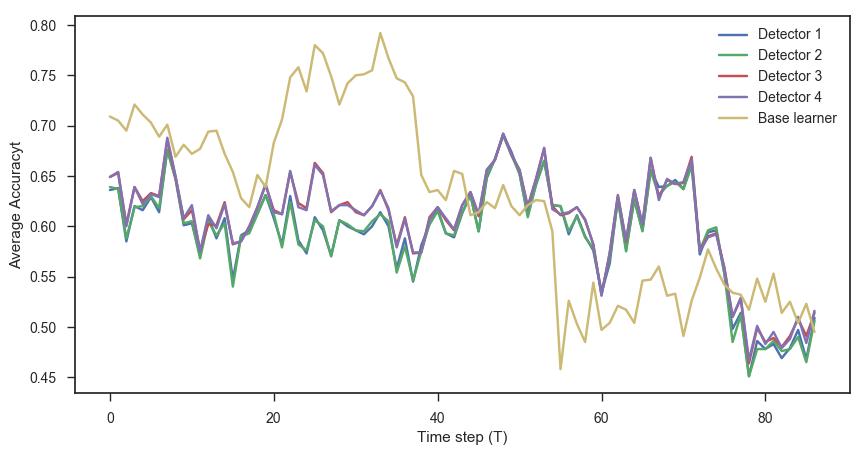

In [181]:
plot_acc(y_true=y_true, 
         probs = [prob1,prob2, prob3, prob4, probb], 
         names=['Detector 1', 'Detector 2', 'Detector 3', 'Detector 4', 'Base learner'],
         T=1000)

In [110]:
def plot_recall(y_true, probs, names=None, T=100):
    length = min([p.shape[0] for p in probs])
    y_true = y_true[-length:]
    probs = [p[-length:,:] for p in probs]
    preds = [list(np.argmax(p,axis=1)) for p in probs]
    recalls=[]
    for i in range(int(length/T)):
        recalls.append([recall_score(y_pred=p[i*T:(i+1)*T], 
                                  y_true=y_true[i*T:(i+1)*T],
                                  average='macro') for p in preds])
    #print(len(accs))
    recalls = np.array(recalls)
    
    plt.figure(figsize=(10,5))
    plt.plot(recalls)
    plt.legend(names)
    plt.xlabel('Time step (T)')
    plt.ylabel('macro-Recall')
    plt.savefig('drift_recall.png', dpi=300, bbox_inches='tight')

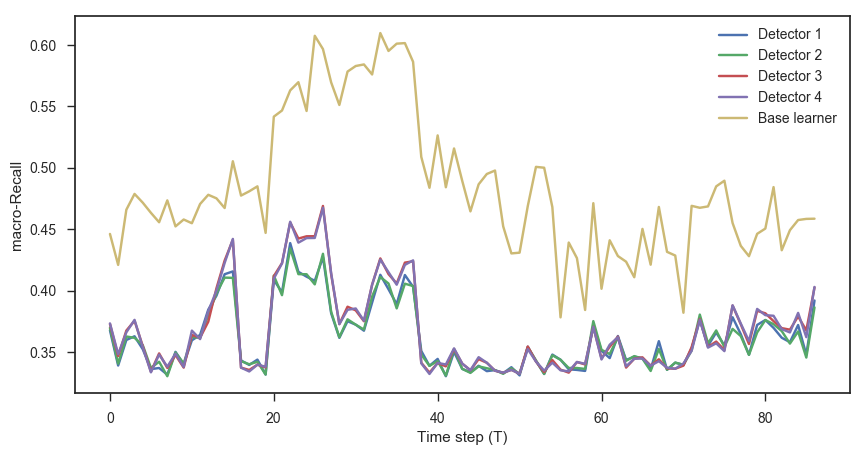

In [182]:
plot_recall(y_true=y_true, 
         probs = [prob1,prob2, prob3, prob4, probb], 
         names=['Detector 1', 'Detector 2', 'Detector 3', 'Detector 4', 'Base learner'],
         T=1000)

In [112]:
def plot_f1(y_true, probs, names=None, T=100):
    length = min([p.shape[0] for p in probs])
    y_true = y_true[-length:]
    probs = [p[-length:,:] for p in probs]
    preds = [list(np.argmax(p,axis=1)) for p in probs]
    recalls=[]
    for i in range(int(length/T)):
        recalls.append([f1_score(y_pred=p[i*T:(i+1)*T], 
                                  y_true=y_true[i*T:(i+1)*T],
                                  average='macro') for p in preds])
    #print(len(accs))
    recalls = np.array(recalls)
    
    plt.figure(figsize=(10,5))
    plt.plot(recalls)
    plt.legend(names)
    plt.xlabel('Time step (T)')
    plt.ylabel('macro-F1 score')
    plt.savefig('drift_f1.png', dpi=300, bbox_inches='tight')

In [ ]:
plot_f1(y_true=y_true, 
        probs = [prob1,prob2, prob3, prob4, probb], 
        names=['Detector 1', 'Detector 2', 'Detector 3', 'Detector 4', 'Base learner'],
        T=1000)

In [204]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.4f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('drift_cm_{}.png'.format(title), dpi=300,bbox_inches='tight')

In [121]:
def plot_cm(y_true, probs, names=None):
    length = min([p.shape[0] for p in probs])
    y_true = y_true[-length:]
    probs = [p[-length:,:] for p in probs]
    preds = [list(np.argmax(p,axis=1)) for p in probs]
    for pred, name in zip(preds,names):
        cm = confusion_matrix(y_true=y_true, y_pred=pred)
        plot_confusion_matrix(cm=cm,
                              classes=['Cold', 'Medium', 'Hot'],
                              normalize=True,
                              title=name)
    #print(len(accs))
    

Normalized confusion matrix
[[  8.18916768e-01   1.80559628e-01   5.23604072e-04]
 [  6.15544949e-01   3.83246738e-01   1.20831319e-03]
 [  6.12756953e-01   3.81348247e-01   5.89480048e-03]]
Normalized confusion matrix
[[  8.17932392e-01   1.81564948e-01   5.02659909e-04]
 [  6.15212663e-01   3.83488400e-01   1.29893668e-03]
 [  6.13814994e-01   3.80592503e-01   5.59250302e-03]]
Normalized confusion matrix
[[  8.37766514e-01   1.62024044e-01   2.09441629e-04]
 [  6.12826245e-01   3.86630014e-01   5.43740938e-04]
 [  6.11698912e-01   3.81499395e-01   6.80169287e-03]]
Normalized confusion matrix
[[  8.37431408e-01   1.62380095e-01   1.88497466e-04]
 [  6.12584582e-01   3.86871677e-01   5.43740938e-04]
 [  6.12152358e-01   3.81045949e-01   6.80169287e-03]]
Normalized confusion matrix
[[ 0.67517698  0.3234826   0.00134043]
 [ 0.34083494  0.6520058   0.00715926]
 [ 0.3396312   0.53022975  0.13013906]]


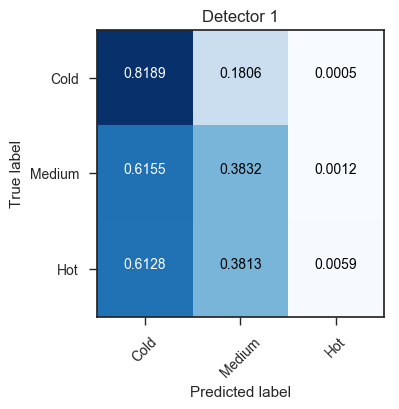

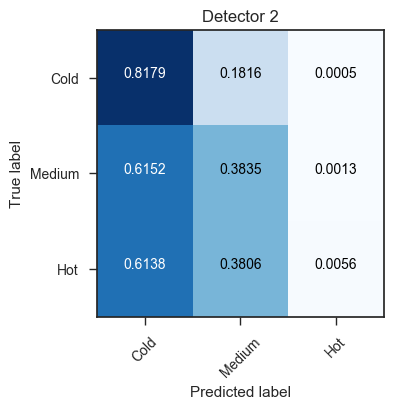

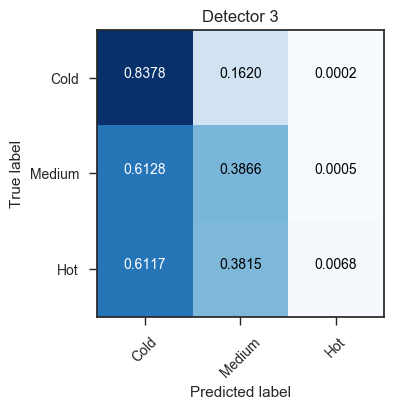

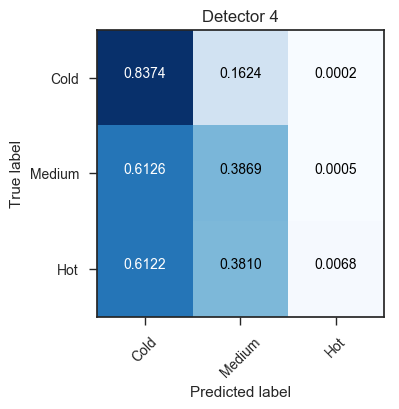

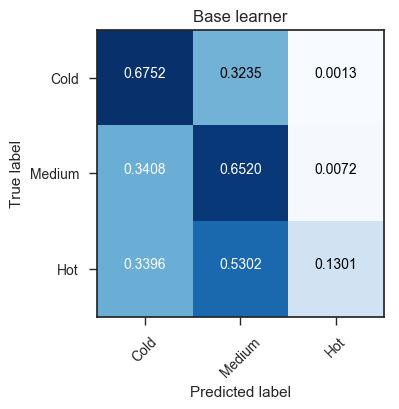

In [186]:
plot_cm(y_true=y_true, 
        probs = [prob1,prob2, prob3, prob4, probb], 
        names=['Detector 1', 'Detector 2', 'Detector 3', 'Detector 4', 'Base learner'])

In [126]:
def print_metrics(y_true, probs, names):
    length = min([p.shape[0] for p in probs])
    y_true = y_true[-length:]
    probs = [p[-length:,:] for p in probs]
    preds = [list(np.argmax(p,axis=1)) for p in probs]
    
    for pred, name in zip(preds, names):
        print(name)
        print('Accuracy: {}'.format(np.mean(pred==y_true)))
        print('Recall: {}'.format(recall_score(y_true=y_true, 
                                               y_pred=pred,
                                               average='macro')))
        print('F1: {}'.format(f1_score(y_true=y_true,
                                       y_pred=pred,
                                       average='macro')))

In [187]:
print_metrics(y_true=y_true, 
            probs = [prob1,prob2, prob3, prob4, probb], 
            names=['Detector 1', 'Detector 2', 'Detector 3', 'Detector 4', 'Base learner'])

Detector 1
Accuracy: 0.5925273820684609
Recall: 0.40268610197827903
F1: 0.3866746821333184
Detector 2
Accuracy: 0.5920586284956441
Recall: 0.4023377651528623
F1: 0.3862626101525379
Detector 3
Accuracy: 0.6041661902910845
Recall: 0.4103994072793183
F1: 0.3943370988098252
Detector 4
Accuracy: 0.6040747261793153
Recall: 0.41036825929037396
F1: 0.39432260445312134
Base learner
Accuracy: 0.6251800699700455
Recall: 0.48577394497047993
F1: 0.49901816681326044


In [188]:
stat1 = np.load('../result/concept_drift/detector_1/stat.npy')
stat2 = np.load('../result/concept_drift/detector_2/stat.npy')
stat3 = np.load('../result/concept_drift/detector_3/stat.npy')
stat4 = np.load('../result/concept_drift/detector_4/stat.npy')

In [198]:
def plot_num_cd(stats, names, T=1000):
    stats = [[s== 3 for s in stat] for stat in stats]
    plt.figure(figsize=(8,4))
    for stat in stats:
        n = []
        for i in range(int(len(stat)/T)):
             n.append( np.sum(stat[i*T:(i+1)*T]))
        plt.plot(n)
    plt.xlabel('Time step (T)')
    plt.ylabel('Number of concept drift')
    plt.legend(names, frameon=True, loc=3)
    plt.savefig('num_cd.png', dpi=300,bbox_inches='tight')
        

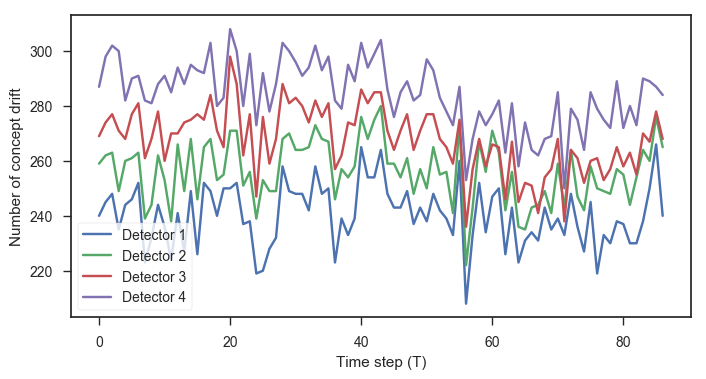

In [199]:
plot_num_cd(stats = [stat1,stat2, stat3, stat4], 
              names=['Detector 1', 'Detector 2', 'Detector 3', 'Detector 4', 'Base learner'])

In [202]:
def plot_num_fa(stats, names, T=1000):
    stats = [[s== 2 for s in stat] for stat in stats]
    plt.figure(figsize=(8,4))
    for stat in stats:
        n = []
        for i in range(int(len(stat)/T)):
             n.append( np.sum(stat[i*T:(i+1)*T]))
        plt.plot(n)
    plt.xlabel('Time step (T)')
    plt.ylabel('Number of false alarm')
    plt.legend(names,frameon=True, loc=3)
    plt.savefig('num_fa.png', dpi=300,bbox_inches='tight')
        

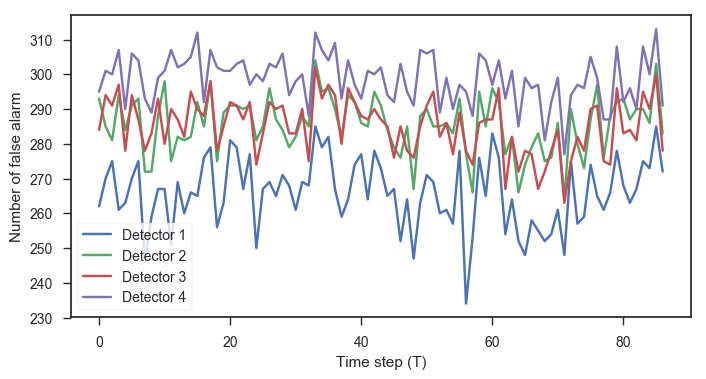

In [203]:
plot_num_fa(stats = [stat1,stat2, stat3, stat4], 
              names=['Detector 1', 'Detector 2', 'Detector 3', 'Detector 4', 'Base learner'])